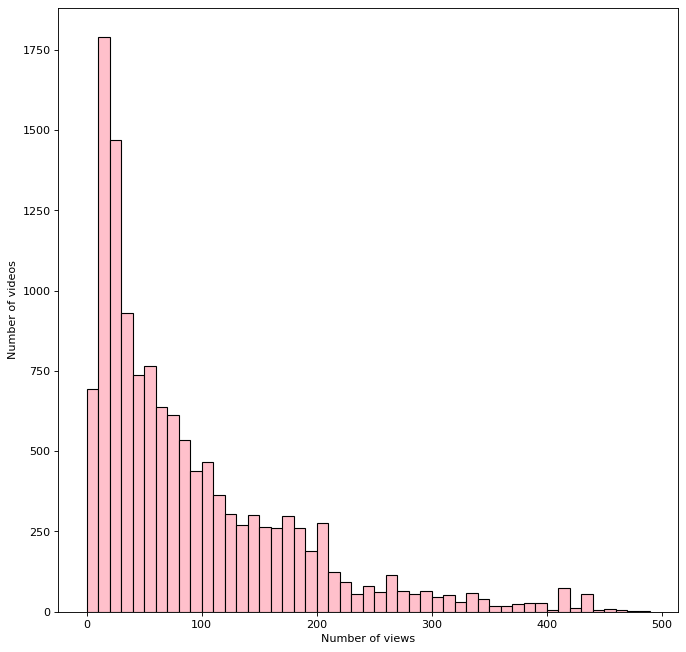

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df9 = pd.read_csv('D:\\DataSets\\combined_csv.csv', index_col=False)


number_of_likes = df9.number_of_likes.dropna()
views = df9.number_of_views


deviation_bins = np.arange(0, 500, 10)
deviation = views/number_of_likes
views_bins = np.arange(0, 5000000, 100000)



plt.figure(figsize=(10, 10), dpi=80)
plt.ticklabel_format(style='plain')
# plt.hist(deviation, bins=deviation_bins, facecolor='orange', edgecolor='black')
# plt.xlabel('Number of likes')
# plt.ylabel('Number of videos')
# plt.savefig('C:\\Users\\gluki\\OneDrive\\Desktop\\Thesis\\Likes.png')

plt.hist(deviation, bins=deviation_bins, facecolor='pink', edgecolor='black')
plt.xlabel('Number of views')
plt.ylabel('Number of videos')
plt.savefig('C:\\Users\\gluki\\OneDrive\\Desktop\\Thesis\\Views.png')


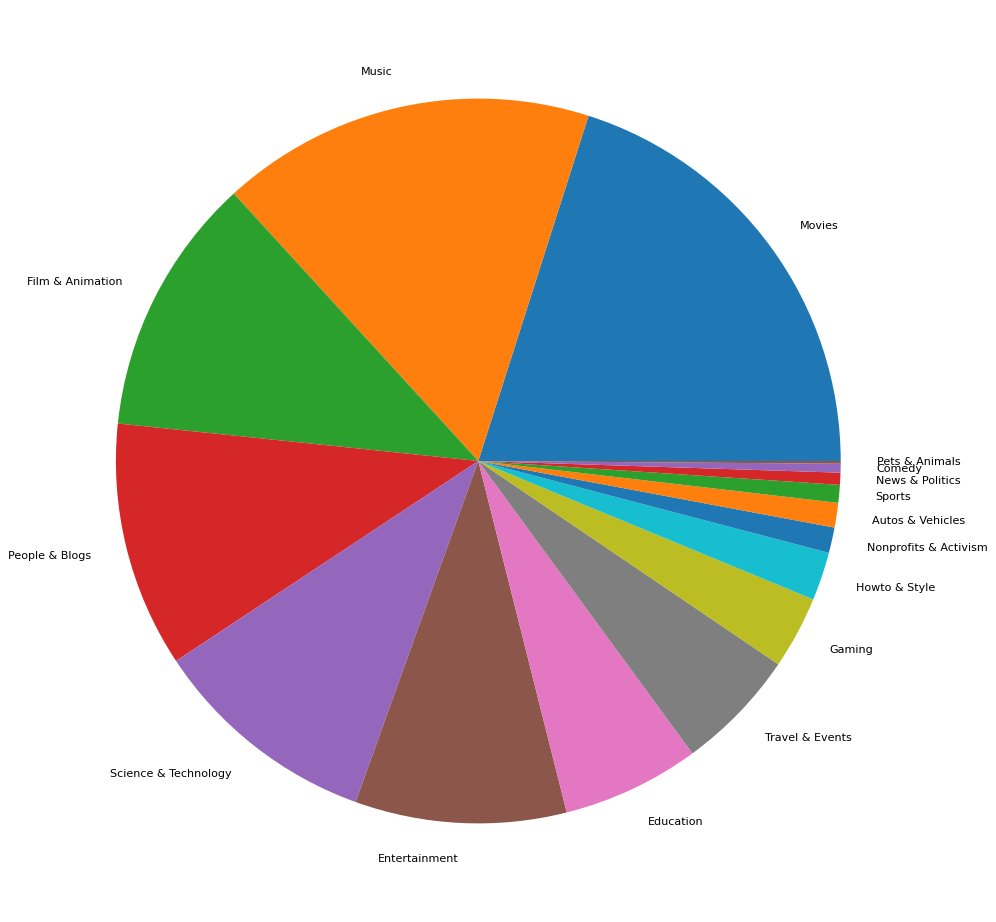

In [179]:
topic = df9.video_category

labels = ['Movies','Music','Film & Animation', 'People & Blogs', 'Science & Technology', 'Entertainment', 'Education', 'Travel & Events', 'Gaming', 'Howto & Style', 'Nonprofits & Activism', 'Autos & Vehicles', 'Sports', 'News & Politics', 'Comedy', 'Pets & Animals']

plt.figure(figsize=(15, 15), dpi=80)
plt.pie(topic.value_counts(), labels=labels)
plt.savefig('C:\\Users\\gluki\\OneDrive\\Desktop\\Thesis\\Pie.png')
# добавить статистику поканалам

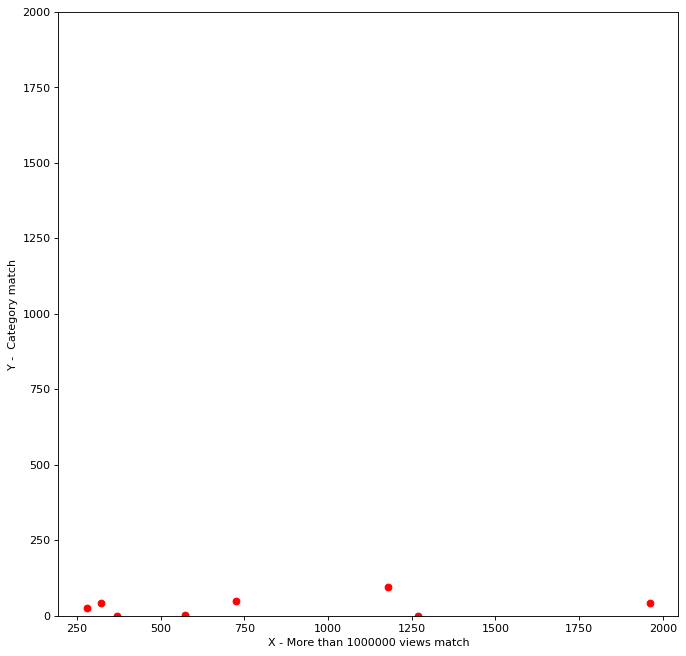

In [30]:
array_of_df = ['Batterflies.csv', 'Chess.csv', 'Documentary.csv','Duration.csv', 'Fishing.csv', 'Fitness.csv', 'Medicine.csv', 'MoostViewed.csv']
array_of_category = [15,17,15,17,26,27,24,27]

def get_views(data_set):
    views = data_set.number_of_views.dropna()
    highly_viewed = sum(views > 1000000)
    return highly_viewed


def get_category(data_set, category_number):
    category = data_set.video_category.dropna()
    cat_tum = sum(category == category_number)

    return cat_tum

array_of_views = []
category_array = []
i=0

for df in array_of_df:
    data_frame = pd.read_csv('D:\\DataSets\\'+df)
    views = get_views(data_frame)
    category = get_category(data_frame, array_of_category[i])
    array_of_views.append(views)
    category_array.append(category)
    # print(array_of_views)
    i+=1


plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(array_of_views,category_array, c='red')
plt.ylim([0,2000])
plt.xlabel('X - More than 1000000 views match')
plt.ylabel('Y -  Category match')
plt.autoscale(enable=False, axis='y')
plt.savefig('C:\\Users\\gluki\\OneDrive\\Desktop\\Thesis\\Views to Category.png')

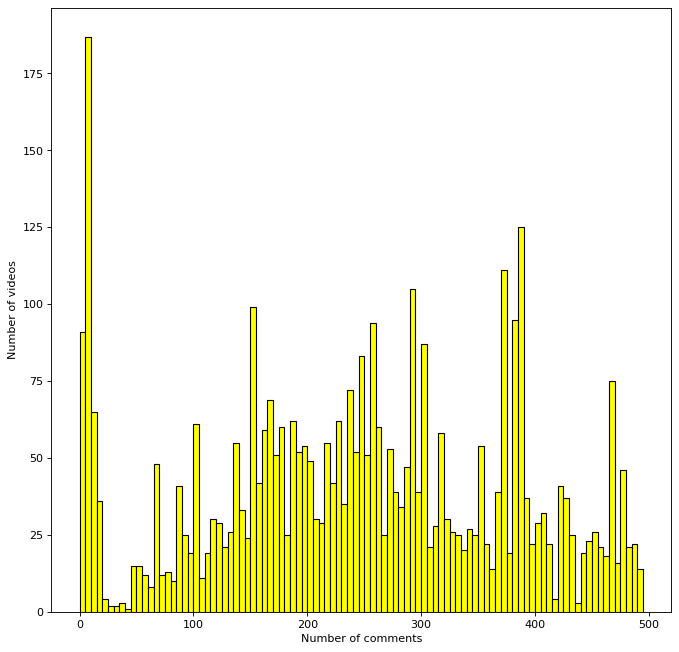

In [186]:
comments = df9.number_of_comments.dropna()
views = df9.number_of_views.dropna()


deviation_bins = np.arange(0, 500, 5)
deviation = views/comments

plt.figure(figsize=(10, 10), dpi=80)
plt.hist(deviation, bins=deviation_bins, facecolor='yellow', edgecolor='black')
plt.xlabel('Number of comments')
plt.ylabel('Number of videos')
plt.savefig('C:\\Users\\gluki\\OneDrive\\Desktop\\Thesis\\Comments.png')


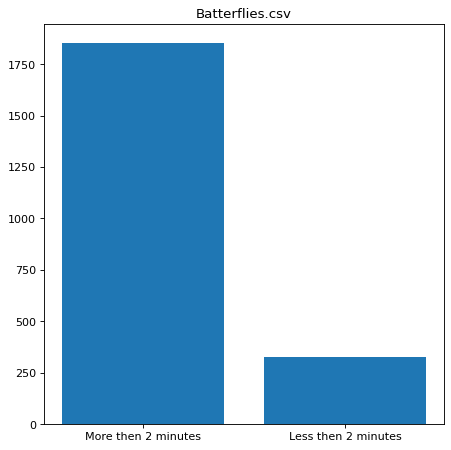

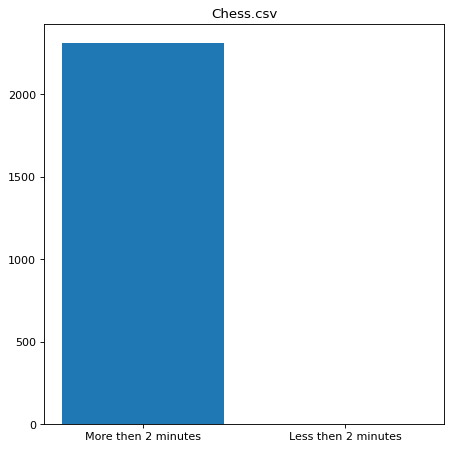

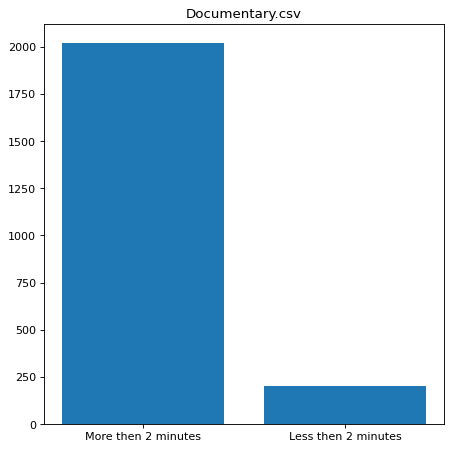

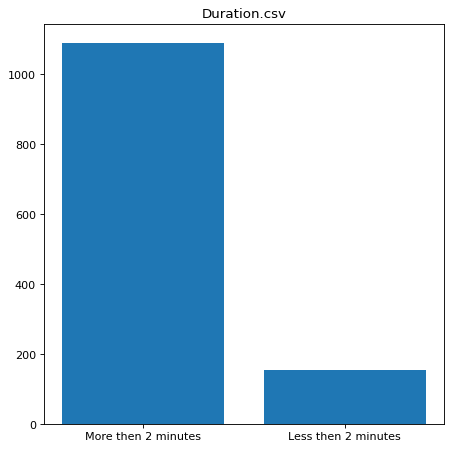

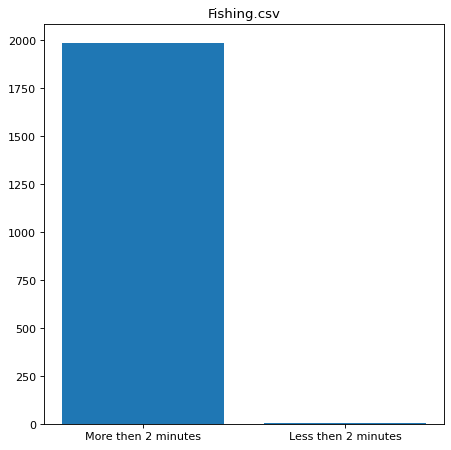

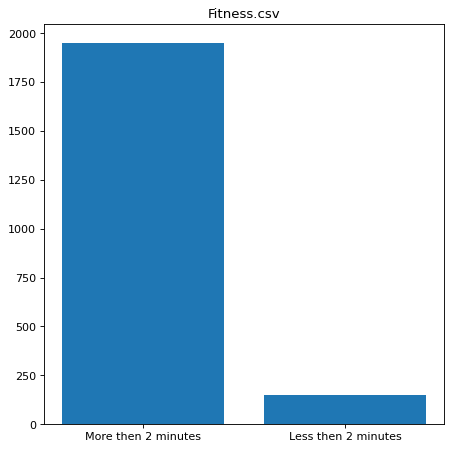

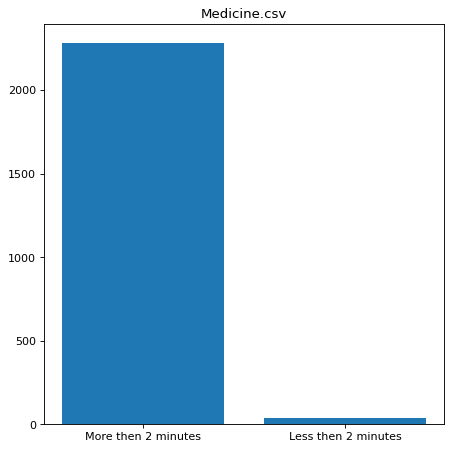

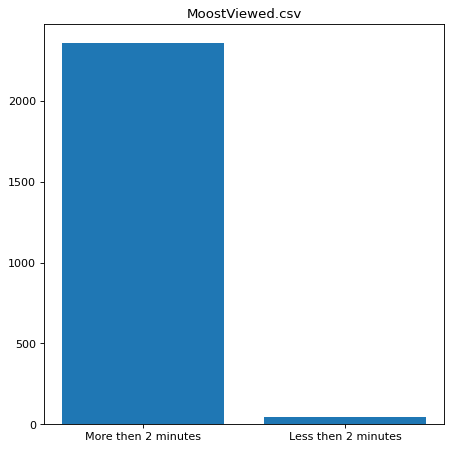

In [137]:
import isodate



def get_duration(data_set):
    more_than_2_mins = []
    less_than_2_mins = []
    for duration_str in data_set:
        video_duration = isodate.parse_duration(duration_str).seconds
        if video_duration > 120:
            more_than_2_mins.append(video_duration)
        else:
            less_than_2_mins.append(video_duration)
    more_number = len(more_than_2_mins)
    less_number = len(less_than_2_mins)
    return more_number, less_number
i= 0
for df in array_of_df:
    i+=1
    data_frame = pd.read_csv('D:\\DataSets\\'+df).video_duration.dropna()
    np_data_frame = data_frame.to_numpy()
    a = get_duration(np_data_frame)
    fig = plt.figure(figsize=(5, 5), dpi=80)
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(df)
    length = ['More then 2 minutes','Less then 2 minutes']
    videos = a[0],a[1]
    plt.bar(length,videos)

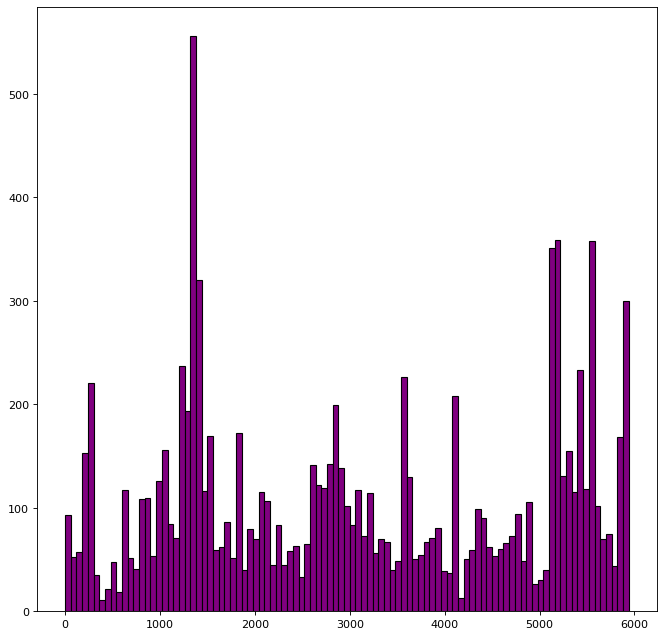

In [188]:
duration_df = df9.video_duration.dropna()

duration_array = []

for duration_str in duration_df:
    video_duration = isodate.parse_duration(duration_str).seconds
    duration_array.append(video_duration)
    duration_array = [i for i in duration_array if i != 0]

duration_bins = np.arange(0, 6000, 60)

plt.figure(figsize=(10, 10), dpi=80)
plt.hist(duration_array, bins=duration_bins, facecolor='purple', edgecolor='black')
plt.savefig('C:\\Users\\gluki\\OneDrive\\Desktop\\Thesis\\Duration.png')
# cdf = np.cumsum(duration_array)
# plt.plot(duration_bins, cdf)

# cdf

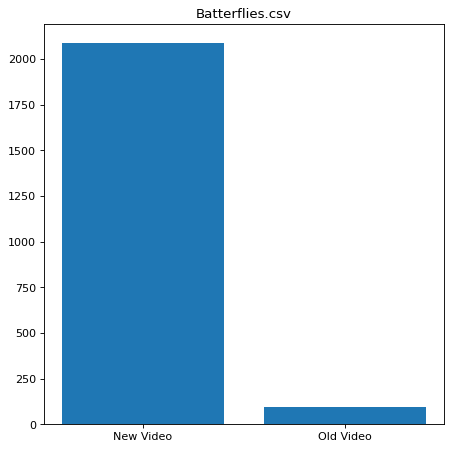

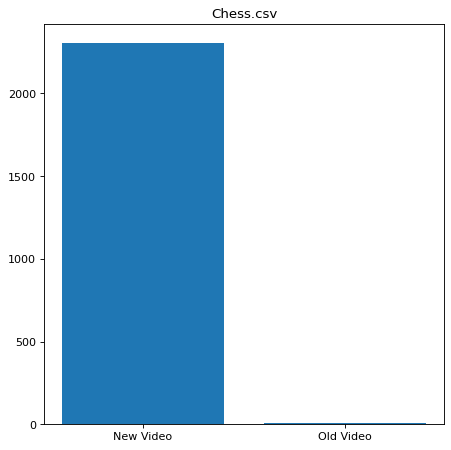

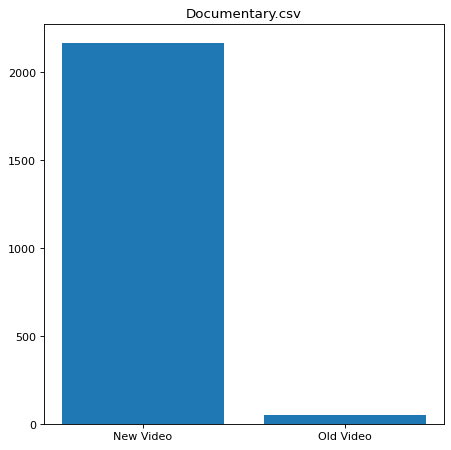

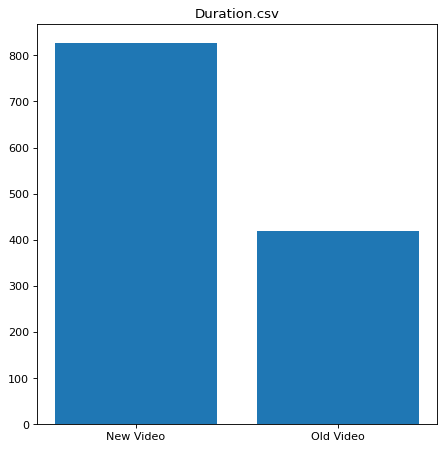

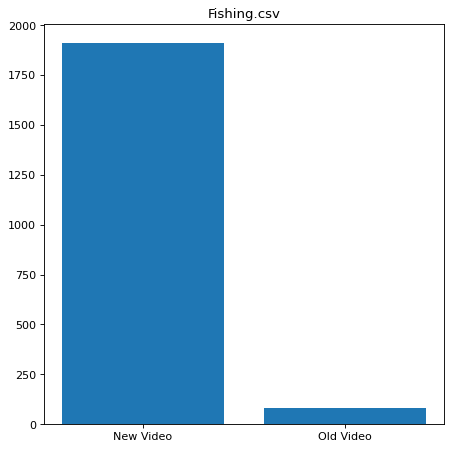

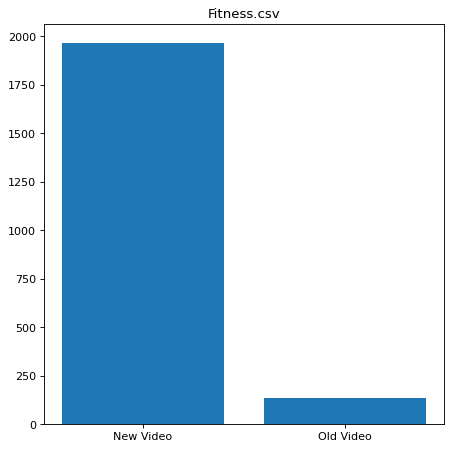

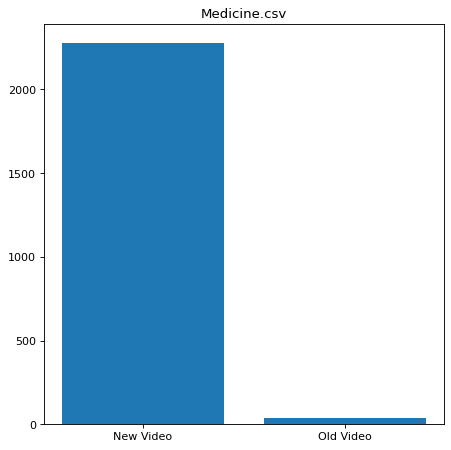

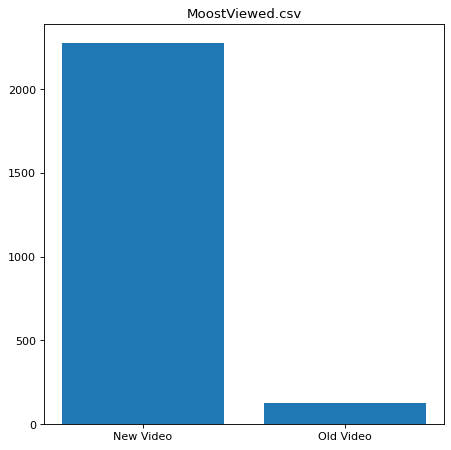

In [189]:
from datetime import date



def get_date(data_set):
    new = []
    old = []
    for date_str in data_set:
        video_date = isodate.parse_datetime(date_str).date()
        current_date = date(2021,12,10)
        if video_date > current_date:
            old.append(video_date)
        else:
            new.append(video_date)

    new_count = len(new)
    old_count = len(old)
    return new_count, old_count


for df in array_of_df:
    data_frame = pd.read_csv('D:\\DataSets\\'+df).date_of_publication.dropna()
    a = get_date(data_frame)
    fig = plt.figure(figsize=(5, 5), dpi=80)
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(df)
    length = ['New Video','Old Video']
    videos = a[0],a[1]
    plt.bar(length,videos)
    plt.show()


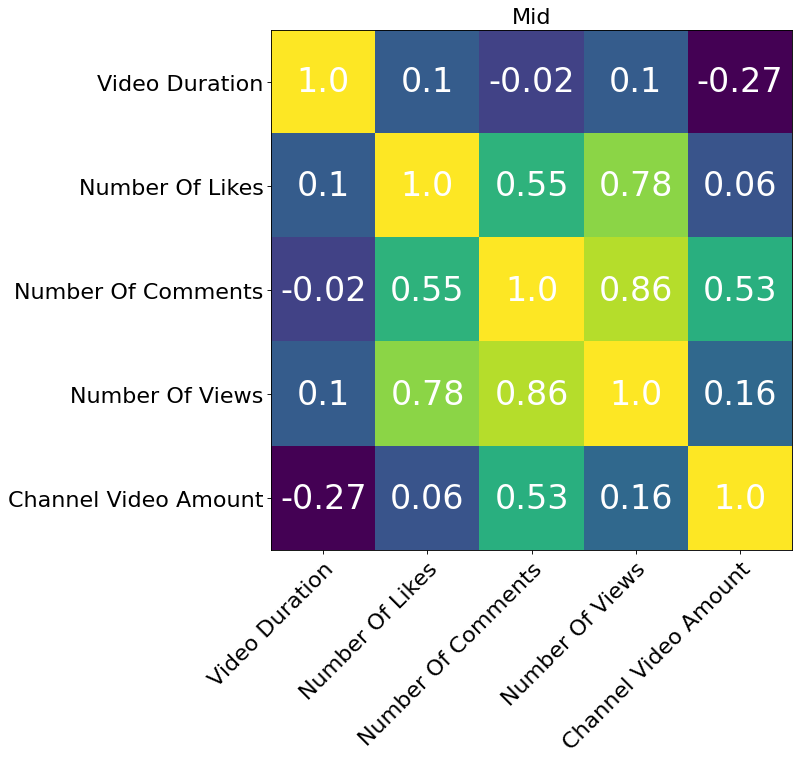

In [193]:
popular = pd.read_csv('D:\\DataSets\\Popular.csv').dropna()
mid = pd.read_csv('D:\\DataSets\\Mid.csv').dropna()
unpopular = pd.read_csv('D:\\DataSets\\Unpopular.csv').dropna()

names = ['Video Duration','Number Of Likes','Number Of Comments','Number Of Views','Channel Video Amount']

subjects = ['Video Duration','Number Of Likes','Number Of Comments','Number Of Views','Channel Video Amount']

def matrix(v1,v2):
    array_main = []
    for i1 in v1:
        array_tmp = []
        for i2 in v2:
            array_tmp.append(round(np.corrcoef(i1, i2)[0, 1], 2))
        array_main.append(array_tmp)
    return array_main

array = matrix([mid['channel_video_count'], mid['number_of_views'], mid['number_of_comments'], mid['number_of_likes'], mid['video_duration']],
       [mid['channel_video_count'], mid['number_of_views'], mid['number_of_comments'], mid['number_of_likes'], mid['video_duration']])



harvest = np.array(array)
fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
im = ax.imshow(harvest)
ax.set_xticks(np.arange(len(names)), labels=names, fontsize=20)
ax.set_yticks(np.arange(len(subjects)), labels=subjects,fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(names)):
    for j in range(len(subjects)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w", fontsize=30)

ax.set_title("Mid", fontsize=20)
fig.tight_layout()
plt.savefig('C:\\Users\\gluki\\OneDrive\\Desktop\\Thesis\\Mid.png')